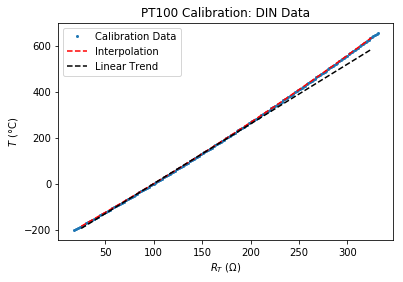

In [96]:
import numpy as np
from scipy.interpolate import UnivariateSpline as spline
import matplotlib.pyplot as plt
def PT100():
    file = 'PT100.txt'
    try:
        data= np.loadtxt(file, dtype=np.str, delimiter=' ', skiprows=2)
    except:
        print('Error missing PT100.txt calib data file!')
    TinK = []
    TinC = []
    R = []
    for i in range(3):
        TinK.append(data[:,i*3])
        TinC.append(data[:,1+i*3])
        R.append(data[:,2+i*3])
    TinK = np.ndarray.flatten(np.array(TinK, dtype=float))
    TinC = np.ndarray.flatten(np.array(TinC, dtype=float))
    R = np.ndarray.flatten(np.array(R, dtype=float))
    interpol = spline(R, TinC)
    return TinK, TinC, R, interpol
def PT100lin(Rt):
    R0 = 100
    a = 0.00385
    T = (Rt/R0 - 1)/a
    return T
TinK, TinC, R, interpol = PT100()

%matplotlib inline
plt.title('PT100 Calibration: DIN Data')
plt.xlabel(r'$R_T$ '+ r'($\Omega$)')
plt.ylabel(r'$T$ '+ '(°C)')
plt.plot(R, TinC,'o',ms=2, label='Calibration Data')
Rspline = np.linspace(25,325,1000)
plt.plot(Rspline, interpol(Rspline),ls='--', color='red',label='Interpolation')
plt.plot(Rspline,PT100lin(Rspline), ls='--', color='black', label='Linear Trend')
plt.legend()